In [1]:
import umap
import sklearn
import pandas as pd
from openTSNE import TSNE
import matplotlib.pyplot as plt
from main import *


def mean(x, size):
    cutoff = len(x) % size
    if cutoff == 0:
        cutoff = -len(x)
    print(len(x), size, cutoff)
    return x[:-cutoff].reshape((-1, size)).mean(axis=1)

In [9]:
# only get 10 lines per algorithm (0-x, 1-x, 2-x, 3-x)
df = pd.read_csv("trace10.csv")
df = df[df["line"].str.endswith("-0")]
df.to_csv("trace1.csv", index=False)
df = pd.read_csv("trace1.csv") # performs re-indexing

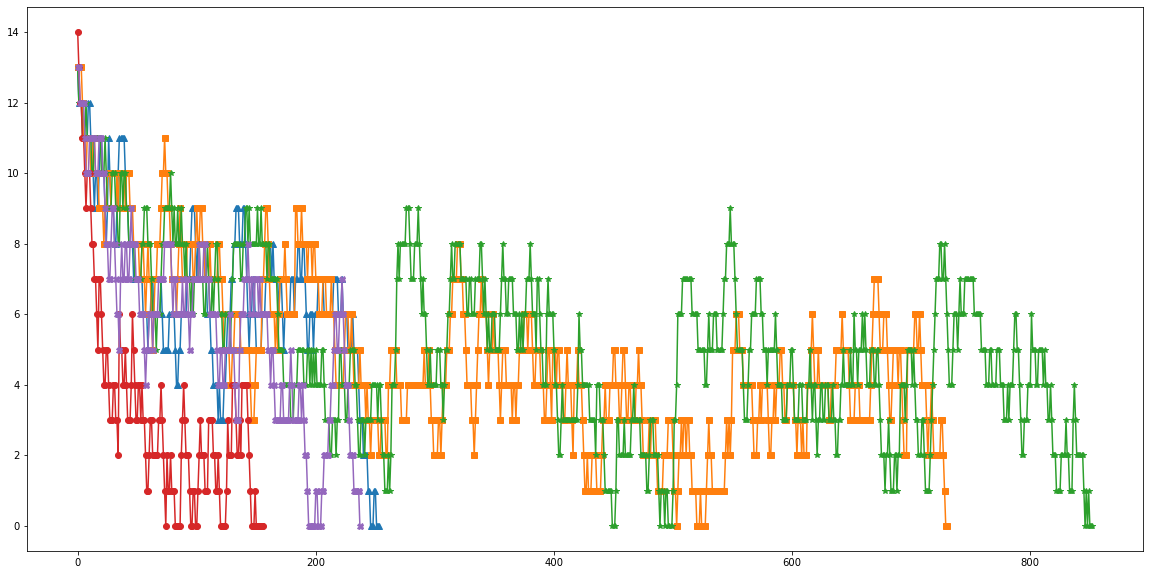

In [12]:
plt.figure(figsize=(20, 10))
xy = df[["step", "zeros"]].to_numpy()
lines = [g[1] for g in df.groupby("line", group_keys=False)]
for line in lines:
    x,y = xy[line.index].T
    plt.plot(x, y, marker=MARKERS[line["algo"].iloc[0]])

In [ ]:
SCIKIT_METRICS = ['euclidean', 'manhattan', 'chebyshev','minkowski',  'wminkowski', 'seuclidean', 'mahalanobis', 'hamming', 'canberra', 'braycurtis']
UMAP_METRICS = ["euclidean","manhattan","chebyshev","minkowski","canberra","braycurtis","mahalanobis","wminkowski","seuclidean","cosine","correlation","haversine","hamming","jaccard","dice","russelrao","kulsinski","ll_dirichlet","hellinger","rogerstanimoto","sokalmichener","sokalsneath","yule"]

df = pd.read_csv("trace1.csv")
lines = [g[1] for g in df.groupby("line", group_keys=False)]
for DATA in [FIELD_, BIN_]: #
    for metric in UMAP_METRICS:
        try:
            # xy = np.log2(df[FIELD_].to_numpy()+1)
            xy = df[DATA].to_numpy()
            #for perplexity in range(50, 150, 20):
            #    for n_neighbors in range(2, 12, 2):
            # xy = TSNE(metric=metric).fit(xy)
            xy = umap.UMAP(metric=metric).fit_transform(xy)
            #xy = sklearn.decomposition.FastICA(n_components=2).fit_transform(xy)
            # xy = sklearn.decomposition.PCA(n_components=2).fit_transform(xy)
            # xy = umap.UMAP().fit_transform(X=xy)
            plt.figure(figsize=(20, 20))
            for line in lines:
                x,y = xy[line.index].T
                marker = MARKERS[line["algo"].iloc[0]]
                plt.plot(x, y, marker=marker)
                plt.legend([metric])
            plt.show()
        except Exception:
            print(metric)